## Chosen topic: markov chain, intergrated circle, order statistics

### Markov Chain
Markov chain means that the future state of the system only depends on its current state and not on the sequence of events that preceded it. This characteristic is often referred to as "memorylessness."

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

We use a 1-dimension random walk as an example: Imagine a person starts at origin (0). He can only walk towards left(-) or right(+). Then the probability of him to walk for the next step is 0.5.

In [2]:
nsteps = 1000 #number of steps to simulate
x = np.zeros(nsteps)
x[0] = 0 #initial state

In this segment, nsteps represents the total number of steps (or transitions) in the Markov chain that I'd like to simulate. The array x is initialized with zeros and has length nsteps. This array will hold the state at each step of the simulation. The initial state is set to 0 (x[0] = 0), which means the random walk starts at position 0 on the number line.

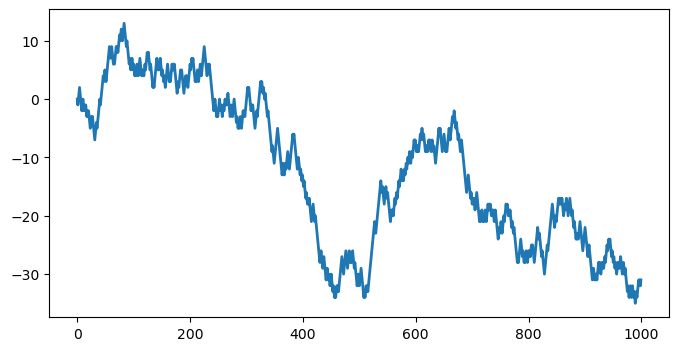

In [3]:
for t in range(nsteps - 1):
    if np.random.rand() <= 0.5:
        x[t + 1] = x[t] + 1 
    else:
        x[t + 1] = x[t] - 1

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

Here is the plot after 1000 steps. Each step (state transition) only depends on the current state (current position of the walker) and not on the path taken to get there, as the future state (next position) does not depend on the sequence of states (positions) that preceded it, but only on the current state.

### Integration Circle

In [4]:
rotation_times = [
    21.80086, 23.74087, 24.6675, 22.1376, 21.4186,
    23.80423, 23.11184, 24.23174, 24.826, 21.44181,
    22.09314, 22.96205, 22.27362, 23.23669, 22.05037,
    21.8075, 22.5501, 24.55148, 23.21969, 24.36872,
    24.56083, 23.8828, 21.84536, 21.90287, 21.55993,
    22.91966, 22.74965, 24.86386, 21.56766, 24.81992,
    22.77892, 21.23745, 22.1006, 21.12459, 21.05793
]

In [5]:
df = pd.DataFrame(rotation_times, columns=['Rotation Time'])

# Constants
arm_length = 1320  # Length of the arm in feet

# Calculate rotation speed in feet per hour (since times are likely in hours)
df['Rotation Speed'] = 2*np.pi * arm_length / df['Rotation Time']

# Calculate mean and standard deviation of the rotation speeds
mean_speed = df['Rotation Speed'].mean()
std_speed = df['Rotation Speed'].std(ddof=1)  # ddof=1 for sample standard deviation

# Calculate the 90% confidence interval for the rotation speed
# The 't' distribution is used because we presumably have a sample, not the entire population
confidence_level = 0.90
degrees_of_freedom = len(df) - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

margin_of_error = t_critical * (std_speed / np.sqrt(len(df)))

lower_bound = mean_speed - margin_of_error
upper_bound = mean_speed + margin_of_error

# Output the results
print(f'Mean Rotation Speed: {mean_speed:.2f} feet per hour')
print(f'Standard Deviation: {std_speed:.2f} feet per hour')
print(f'90% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f}) feet per hour')

Mean Rotation Speed: 364.20 feet per hour
Standard Deviation: 19.32 feet per hour
90% Confidence Interval: (358.67, 369.72) feet per hour



#### Methodology

The arm length, including the end-gun, is considered to be 1420 feet. The speed of the rotating arm at the outer wheels (in feet per hour) is calculated as the total arm length divided by the rotation time for each measurement.

The formula used is:

$$
\text{Speed} = \frac{\text{Arm Length}}{\text{Rotation Time}}
$$

For each rotation time \( t \), we calculate the speed $( s = \frac{1420}{t} )$.

#### Statistical Analysis

The mean (\( \bar{x} \)) and standard deviation (\(s\)) of the calculated speeds are computed. We then calculate the 90% confidence interval for the mean speed using:

$$
\bar{x} \pm t_{\frac{\alpha}{2}, n-1} \times \left(\frac{s}{\sqrt{n}}\right)
$$

where:
- $( \bar{x} )$ is the sample mean of the speeds.
- $( t_{\frac{\alpha}{2}, n-1} )$ is the critical value from the Student's t-distribution with \(n-1\) degrees of freedom, corresponding to a 90% confidence level.
- \(s\) is the sample standard deviation of the speeds.
- \(n\) is the number of observations.

#### Results

Insert the calculated mean speed, standard deviation, critical t-value, and the resulting confidence interval in this section. For example, if the mean speed $( \bar{x} = 62.35 $) feet per hour, the standard deviation $( s = 3.31 )$ feet per hour, and the critical t-value $( t_{\frac{\alpha}{2}, n-1} \approx 1.685 $) for $( n = 35 $) at a 90% confidence level, the confidence interval calculation would be:

$$
62.35 \pm 1.685 \times \left(\frac{3.31}{\sqrt{35}}\right) $$


### Order Statistics

#### Uniform Distribution:

A Uniform distribution in the interval from 0 to 1, denoted as $U(0, 1)$, is characterized by the following:

- **Probability Density Function (PDF)**:
  $$f(x) = \frac{1}{b-a} \quad \text{for} \quad a \leq x \leq b$$

- **Cumulative Distribution Function (CDF)**:
  $$F(x) = \int_{a}^{x} \frac{1}{b-a}dx = \frac{x-a}{b-a} \quad \text{for} \quad a \leq x \leq b$$

#### Order Statistics for Uniform Distribution:

For a sample of size $n$ from a $U(0, 1)$ distribution, the $k$-th order statistic, denoted by $X_{(k)}$ (the $k$-th smallest value), has the following probability density function (PDF):

$$f_{(k)}(x) = \frac{n!}{(k-1)!(n-i)!} x^{k-1} (1 - x)^{n-k} \quad \text{for} \quad 0 \leq x \leq 1$$

This formula indicates that the $k$-th order statistic from a uniform distribution follows a Beta distribution with parameters $k$ and $n+1-k$, specifically, $Beta(k, n+1-k)$.

#### Simulation and Plot

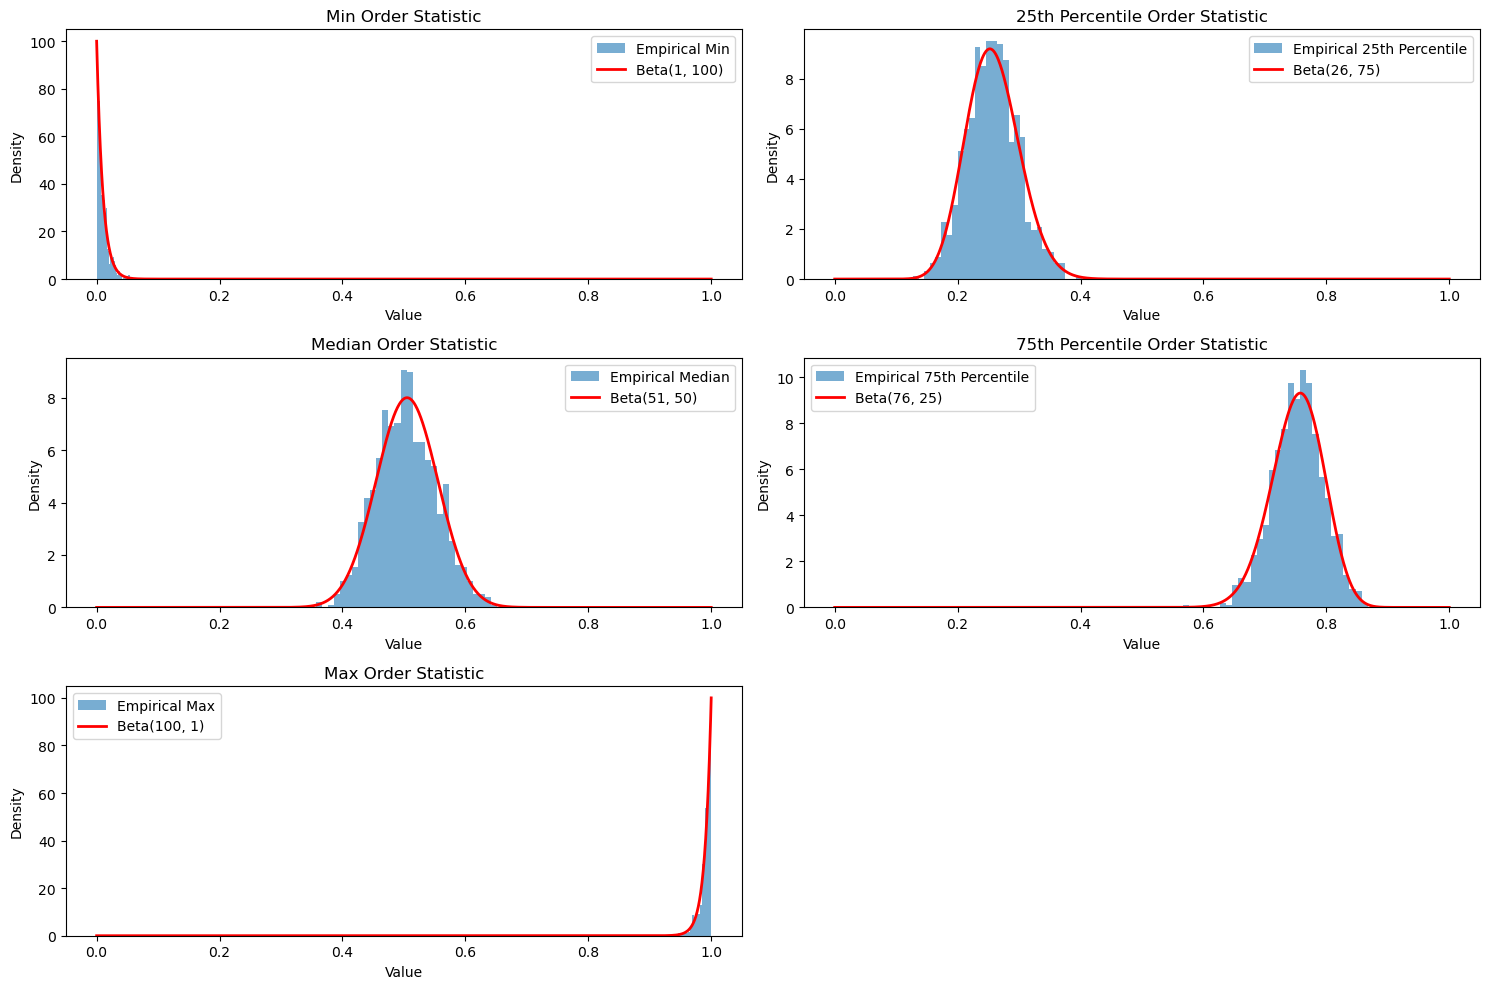

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the simulations and beta distributions
n = 1000  # Number of simulations
sample_size = 100  # Size of each sample
labels = ['Min', '25th Percentile', 'Median', '75th Percentile', 'Max']
beta_params = [(1, sample_size), (26, 75), (51, 50), (76, 25), (sample_size, 1)]

# Storing order statistics
order_statistics = np.zeros((n, 5))

# Generating the uniform samples and calculating the order statistics
for i in range(n):
    sample = np.sort(np.random.uniform(0, 1, sample_size))
    order_statistics[i] = [sample[0], sample[int(0.25 * sample_size)], sample[int(0.5 * sample_size)], sample[int(0.75 * sample_size)], sample[-1]]

# Plotting the histograms and Beta distributions
plt.figure(figsize=[15, 10])
x_values = np.linspace(0, 1, 1000)

for i in range(5):
    plt.subplot(3, 2, i + 1)
    plt.hist(order_statistics[:, i], bins=30, density=True, alpha=0.6, label=f'Empirical {labels[i]}')
    y_values = beta.pdf(x_values, beta_params[i][0], beta_params[i][1])
    plt.plot(x_values, y_values, 'r-', lw=2, label=f'Beta({beta_params[i][0]}, {beta_params[i][1]})')
    plt.title(f'{labels[i]} Order Statistic')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


#### Exponential Distribution:

An Exponential distribution with rate parameter $\lambda$, denoted as $Exp(\lambda)$, is characterized by the following:

- **Probability Density Function (PDF)**:
  $$f(x) = \lambda e^{-\lambda x} \quad \text{for} \quad x \geq 0$$

- **Cumulative Distribution Function (CDF)**:
  $$F(x) = 1 - e^{-\lambda x} \quad \text{for} \quad x \geq 0$$

#### Order Statistics for Exponential Distribution:

For a sample of size $n$ from an $Exp(\lambda)$ distribution, the $k$-th order statistic, denoted by $X_{(k)}$, follows the distribution:

$$f_{(k)}(x) = \lambda e^{-\lambda x} \left(\sum_{j=0}^{k-1} \frac{(\lambda x)^j}{j!}\right) \quad \text{for} \quad x \geq 0$$



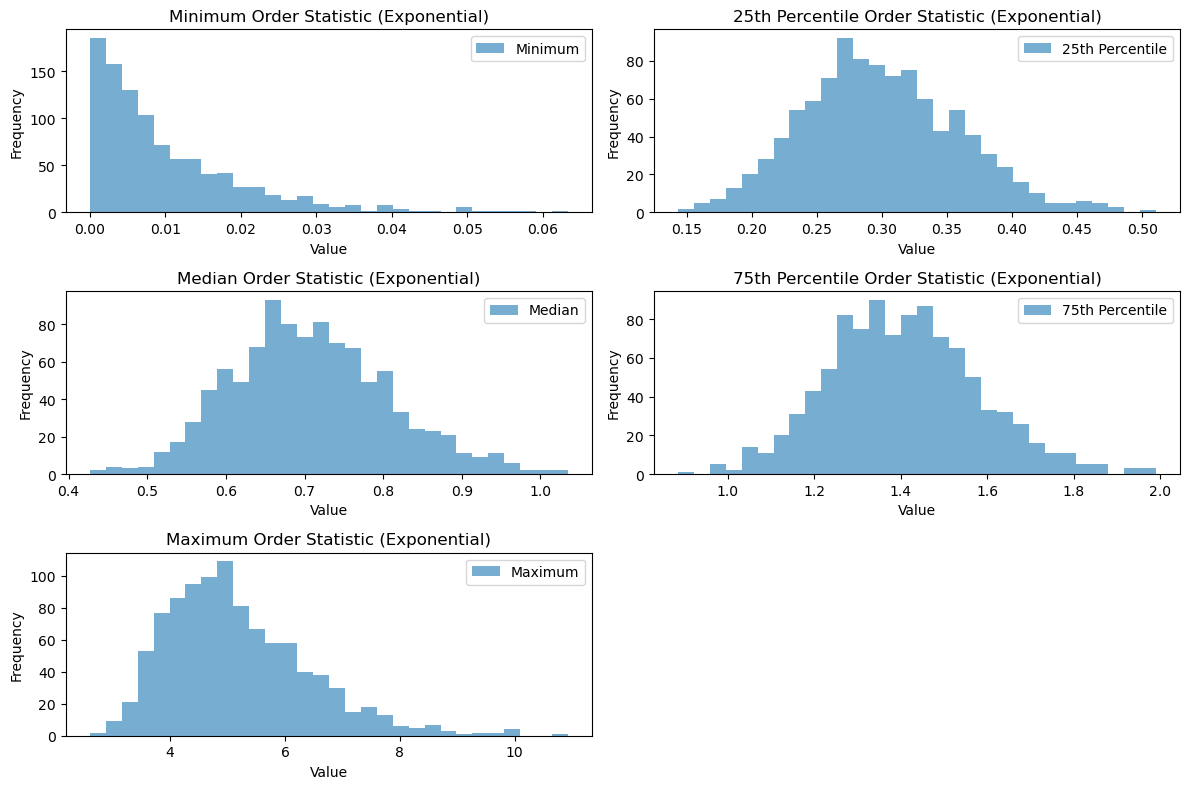

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # number of simulations
sample_size = 100  # size of each sample
lambda_param = 1  # rate parameter for the exponential distribution

# Storing order statistics for exponential distribution
exp_order_statistics = np.zeros((n, 5))

# Simulate
for i in range(n):
    sample = np.sort(np.random.exponential(1/lambda_param, sample_size))
    exp_order_statistics[i, :] = [sample[0], 
                                  sample[int(0.25 * sample_size)], 
                                  sample[int(0.5 * sample_size)], 
                                  sample[int(0.75 * sample_size)], 
                                  sample[-1]]

# Plotting the histograms
plt.figure(figsize=[12, 8])
labels = ['Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.hist(exp_order_statistics[:, i], bins=30, alpha=0.6, label=f'{labels[i]}')
    plt.title(f'{labels[i]} Order Statistic (Exponential)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


#### Normal Distribution:

A Normal distribution with mean $\mu$ and variance $\sigma^2$, denoted as $N(\mu, \sigma^2)$, is characterized by the following:

- **Probability Density Function (PDF)**:
  $$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} \quad \text{for} \quad x \in \mathbb{R}$$

- **Cumulative Distribution Function (CDF)**:
  Not expressed in elementary functions but known as the $\Phi$ function for standard normal distribution.

#### Order Statistics for Normal Distribution:

The order statistics of the Normal distribution do not have closed-form expressions like those of the Uniform or Exponential distributions. However, they are well-defined and can be simulated.


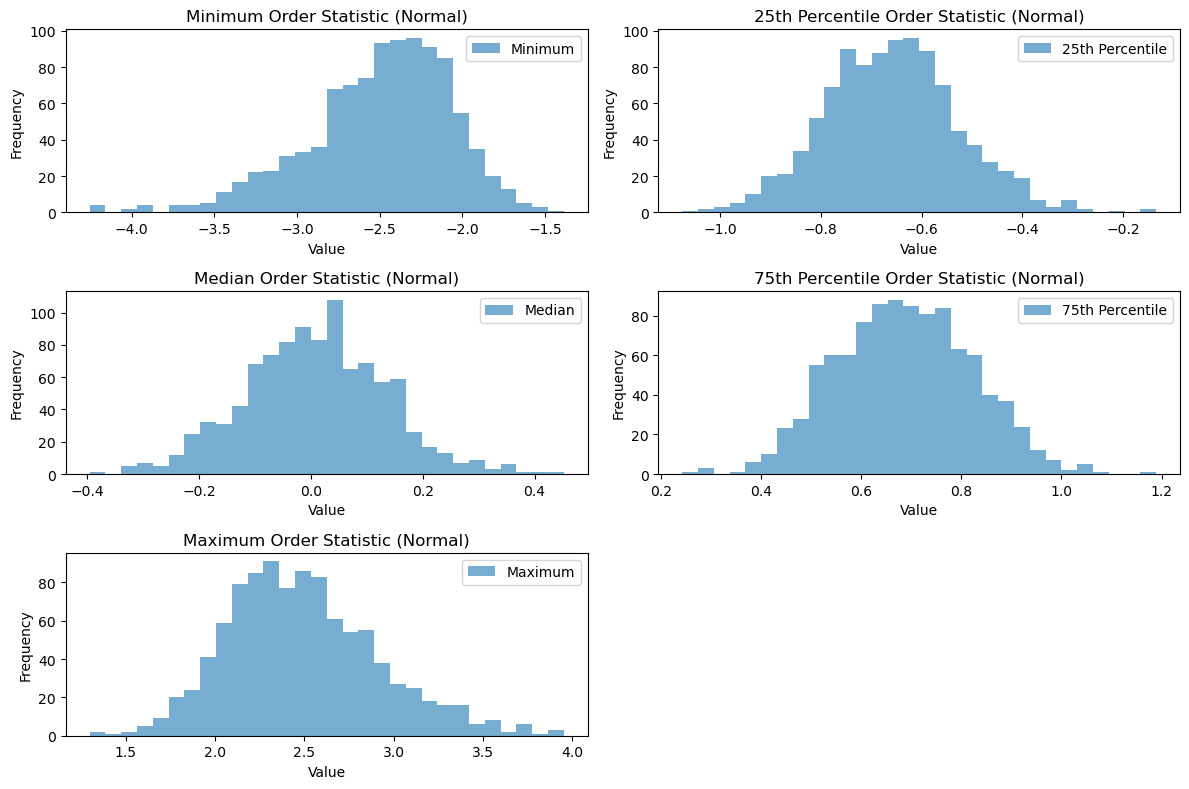

In [13]:
# Parameters for the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Storing order statistics for normal distribution
norm_order_statistics = np.zeros((n, 5))

# Simulate
for i in range(n):
    sample = np.sort(np.random.normal(mu, sigma, sample_size))
    norm_order_statistics[i, :] = [sample[0], 
                                   sample[int(0.25 * sample_size)], 
                                   sample[int(0.5 * sample_size)], 
                                   sample[int(0.75 * sample_size)], 
                                   sample[-1]]

# Plotting the histograms
plt.figure(figsize=[12, 8])
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.hist(norm_order_statistics[:, i], bins=30, alpha=0.6, label=f'{labels[i]}')
    plt.title(f'{labels[i]} Order Statistic (Normal)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


Order statistics from samples of a uniform distribution is well-understood and characterized by the Beta distribution. The plot shows that the uniform distribution is neatly aligns with the properties of the Beta distribution.

In contrast, order statistics from exponential and normal distributions do not follow such straightforward distributions. While the minimum order statistic from exponential distributions does follow another exponential distribution, and spacings between order statistics have identifiable distributions (for exponential), the complete set of order statistics does not align with a single, simple distribution like the Beta. For normal distributions, the situation is even more complex due to the lack of closed-form expressions for the distribution of order statistics, except for numerical approximations or simulations.
